In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

from src.plummer_bg_sig import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_all = pd.read_csv('dwarf-csvs/dwarfs_detail.csv').drop(columns=['Unnamed: 0'])
df_all = df_all.sort_values(by=['rh_deg'])

df_all.sample(3)

,GalaxyName,RA_deg,Dec_deg,Distance_pc,rh(arcmins),Nstar_rh,pmra_rh,pmdec_rh,Nstar_2rh,pmra_2rh,pmdec_2rh,Nbg_per_deg2,rh_deg,Nstar_per_rhdeg3
38,PiscesII,344.629167,5.952500,181970.085861,1.10,4,-2.250491,-11.133856,15,-1.836363,-11.565892,3472.471486,0.018333,649135.987979
40,ReticulumIII,56.360000,-60.450000,91622.049012,2.40,11,4.289628,3.952851,42,5.814544,-3.268421,2055.751348,0.040000,171875.000000
27,Indus1,317.204583,-51.165556,100000.000000,1.26,8,-0.354217,-3.079756,29,3.290556,-6.790765,5052.537876,0.021000,863837.598531


In [4]:
df = df_all[['GalaxyName', 'Nstar_rh', 'rh_deg', 'Nbg_per_deg2', 'Nstar_per_rhdeg3']]
df.sample(3)

,GalaxyName,Nstar_rh,rh_deg,Nbg_per_deg2,Nstar_per_rhdeg3
52,UrsaMajorII,311,0.266667,1405.537091,16400.390625
23,Horologium1,7,0.021833,2448.394906,672570.638822
20,Grus1,11,0.029500,3169.992163,428476.134366


In [5]:
n_dwarf = df.shape[0]
res_means = np.array([])

list_bgres, list_sigs = [], []
keys_bgres, keys_sigs = [], []

dict_analysis = {}

for i in range(n_dwarf):
    print('\n')
    print('--------------------------------------------------')
    print('\n')
    print(df['GalaxyName'][i])
    
    rh = df['rh_deg'][i]
    nstar = df['Nstar_rh'][i]   

#     sigma1 = 0.01
    sigma1 = rh / 10
    sigma2 = 0.68 * rh
    sigma3 = 0.5
    
    rmax = max(10 * rh, rh + 3.*sigma3)
    
    width = 2 * rmax
    pixelsize = sigma1 / 2.
    surface_density = df['Nbg_per_deg2'][i]
    nbg = round((2*rmax)**2 * surface_density)
    
        
    res_dict, sigs_dict = main(rh, nstar, rmax, sigma1, sigma2, sigma3, 
                               width, pixelsize, surface_density, 
                               is_plot=False, is_detail=False)
    
    elements = ['_min', '_max', '_mean', '_std']
    
    if i==0:
        for j,e in enumerate(elements):
            for k,v in sigs_dict.items():
                dict_analysis[k + e] = [v[j]]
            for k,v in res_dict.items():
                dict_analysis[k + e] = [v[j]]
    else:
        for j,e in enumerate(elements):
            for k,v in sigs_dict.items():
                dict_analysis[k + e].append(v[j])
            for k,v in res_dict.items():
                dict_analysis[k + e].append(v[j])

    res_means = np.append(res_means, 100. * res_dict['in_dwarf_res_nbg'][2])

print('\n')
print('--------------------------------------------------')
print('\n')

df_analysis = pd.DataFrame.from_dict(dict_analysis)

df['res_mean(%)'] = np.array(res_means)

df = pd.concat([df, df_analysis], axis=1)

# df_sub = df[['GalaxyName', 'res_mean(%)']].sort_values('res_mean(%)')
# df_sub.to_csv('20190910.csv')



--------------------------------------------------


Antlia2
Added a mask array telling if pixels are inside the dwarf. 

Added a mask array telling if pixels overlap the dwarf and the outer aperture. 

Took 0.3173s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



--------------------------------------------------


Aquarius2
Added a mask array telling if pixels are inside the dwarf. 

Added a mask array telling if pixels overlap the dwarf and the outer aperture. 

Took 0.7202s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



--------------------------------------------------


Bootes(I)
Added a mask array telling if pixels are inside the dwarf. 

Added a mask array telling if pixels overlap the dwarf and the outer aperture. 

Took 0.2125s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



--------------------------------------------------


Bootes3
Added a mask array telling if pixels are inside 

Took 11.3100s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



--------------------------------------------------


IndusI?
Added a mask array telling if pixels are inside the dwarf. 

Added a mask array telling if pixels overlap the dwarf and the outer aperture. 

Took 1.9743s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



--------------------------------------------------


LeoI
Added a mask array telling if pixels are inside the dwarf. 

Added a mask array telling if pixels overlap the dwarf and the outer aperture. 

Took 1.2620s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



--------------------------------------------------


LeoII
Added a mask array telling if pixels are inside the dwarf. 

Added a mask array telling if pixels overlap the dwarf and the outer aperture. 

Took 2.6914s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



---------------------------

Took 3.1452s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



--------------------------------------------------




In [6]:
df.sort_values('res_mean(%)').tail(5)

,GalaxyName,Nstar_rh,rh_deg,Nbg_per_deg2,Nstar_per_rhdeg3,res_mean(%),in_dwarf_s2_min,overlap_s2_min,outskirt_s2_min,in_dwarf_s5_min,...,outskirt_s2_std,in_dwarf_s5_std,overlap_s5_std,outskirt_s5_std,in_dwarf_s8_std,overlap_s8_std,outskirt_s8_std,in_dwarf_res_nbg_std,overlap_res_nbg_std,outskirt_res_nbg_std
0,Antlia2,116512,1.270000,22606.534288,56879.987776,-2.053504e+00,1.726514,1.963936,1.963895,4.714157,...,1.345984e-02,8.476025e-01,1.317789e-01,1.322651e-02,8.812872e-01,1.403426e-01,1.130162e-02,6.317605e-02,1.208900e-02,3.474639e-04
31,LeoIV,57,0.076667,2130.088841,126489.685214,-2.030455e+00,3.042794,3.299017,3.301398,5.078724,...,1.298306e-04,2.714392e-01,1.041429e-03,1.676015e-04,2.123756e-01,1.360281e-03,2.189258e-04,7.802900e-02,1.277222e-02,2.094228e-04
34,Pegasus3,7,0.021667,4520.377082,688211.197087,-2.022234e+00,2.433464,2.556085,2.556167,5.265048,...,3.401261e-06,3.529945e-02,3.319821e-05,5.219866e-06,1.564780e-01,4.408006e-05,6.930869e-06,6.415119e-02,3.137593e-03,9.666327e-06
50,TucanaV,0,0.016667,1145.915590,0.000000,-1.990088e+00,3.157567,3.157567,3.157567,6.388176,...,1.998401e-14,1.617281e-15,1.495080e-15,5.357116e-14,1.560656e-15,1.669836e-14,8.115898e-14,3.167232e-16,3.056001e-16,3.021916e-16
19,Fornax,14912,0.276667,15045.444207,704150.321711,1.683089e-14,1.828770,2.158036,2.276676,4.790968,...,1.114654e-02,5.229926e-01,1.602414e-01,1.320835e-02,5.818457e-01,1.888948e-01,1.508923e-02,1.272955e-01,5.491183e-02,2.682999e-03


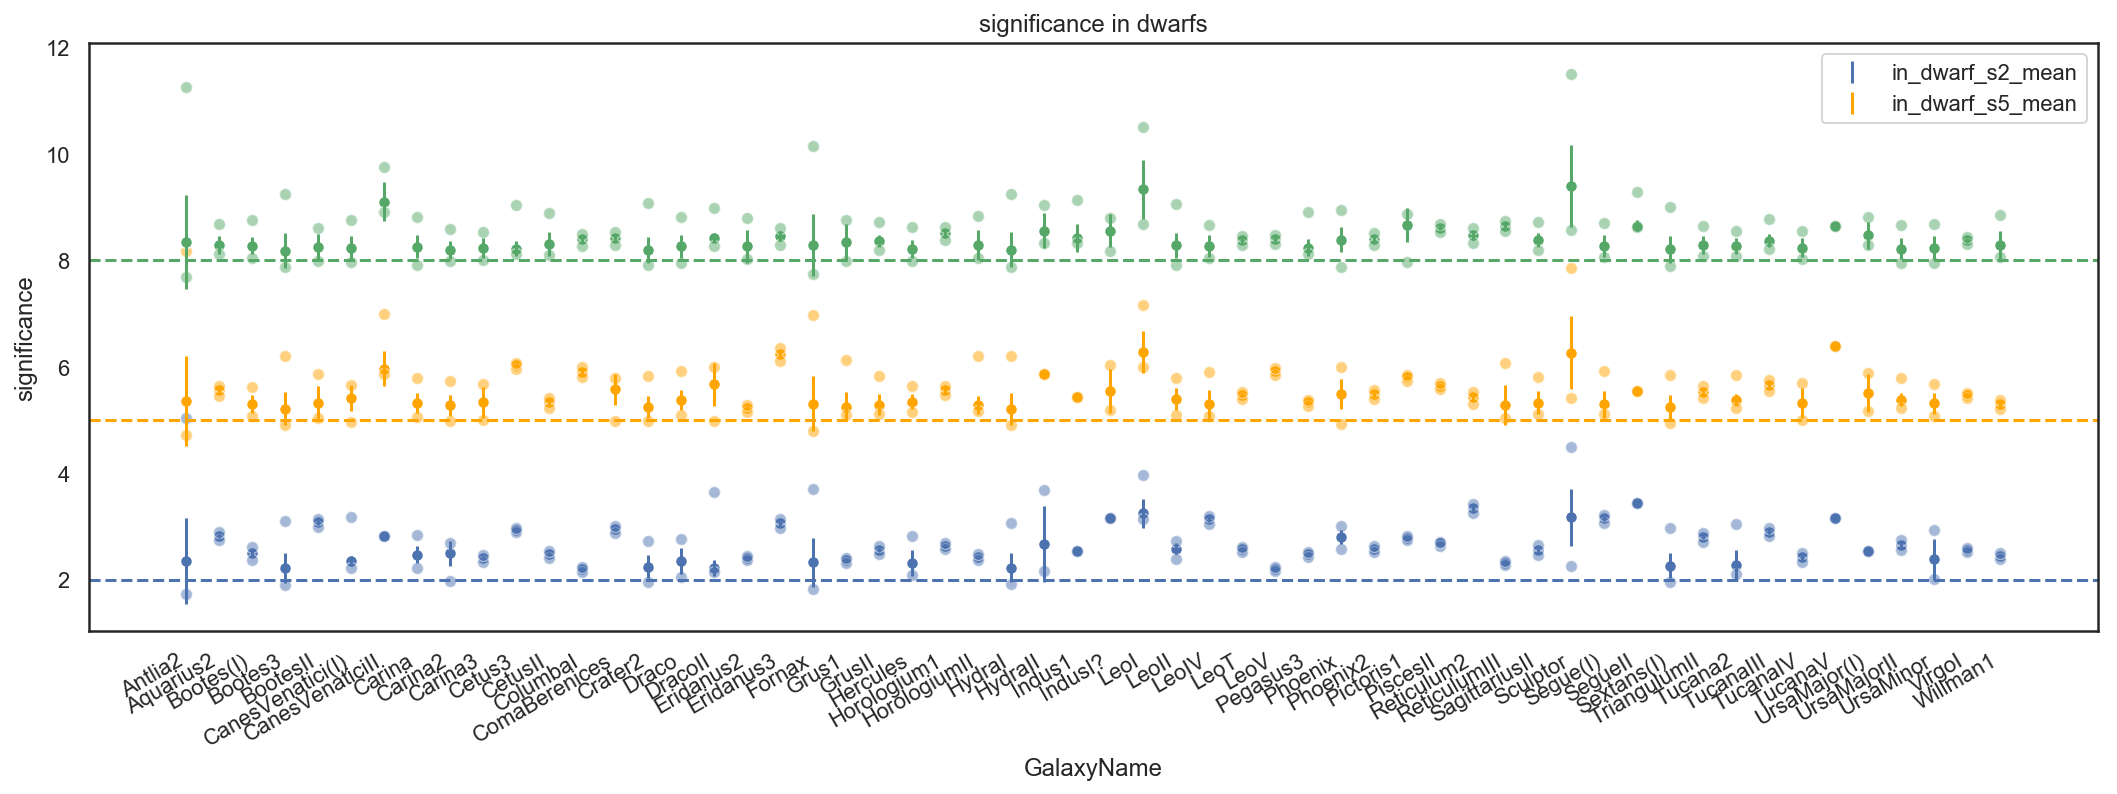

In [7]:
sns.set(style="white", color_codes=True, font_scale=1)
fig, ax = plt.subplots(figsize=(18, 6))

alpha = 0.5

sns.scatterplot(x=df['GalaxyName'], y=df['in_dwarf_s2_mean'], ax=ax, color='b')
sns.scatterplot(x=df['GalaxyName'], y=df['in_dwarf_s2_min'], ax=ax, color='b', alpha=alpha)
sns.scatterplot(x=df['GalaxyName'], y=df['in_dwarf_s2_max'], ax=ax, color='b', alpha=alpha)
ax.errorbar(df['GalaxyName'], df['in_dwarf_s2_mean'], yerr=df['in_dwarf_s2_std'], color='b', ls='none')
ax.axhline(2, ls='--', color='b')

sns.scatterplot(x=df['GalaxyName'], y=df['in_dwarf_s5_mean'], ax=ax, color='orange')
sns.scatterplot(x=df['GalaxyName'], y=df['in_dwarf_s5_min'], ax=ax, color='orange', alpha=alpha)
sns.scatterplot(x=df['GalaxyName'], y=df['in_dwarf_s5_max'], ax=ax, color='orange', alpha=alpha)
ax.errorbar(df['GalaxyName'], df['in_dwarf_s5_mean'], yerr=df['in_dwarf_s5_std'], color='orange', ls='none')
ax.axhline(5, ls='--', color='orange')

sns.scatterplot(x=df['GalaxyName'], y=df['in_dwarf_s8_mean'], ax=ax, color='g')
sns.scatterplot(x=df['GalaxyName'], y=df['in_dwarf_s8_min'], ax=ax, color='g', alpha=alpha)
sns.scatterplot(x=df['GalaxyName'], y=df['in_dwarf_s8_max'], ax=ax, color='g', alpha=alpha)
ax.errorbar(df['GalaxyName'], df['in_dwarf_s8_mean'], yerr=df['in_dwarf_s8_std'], color='g', ls='none')
ax.axhline(8, ls='--', color='g')

fig.autofmt_xdate()
ax.set_ylabel('significance')
ax.set_title('significance in dwarfs')

# plt.savefig('sig_in_dwarf.png', bbox_inches='tight', dpi=300)

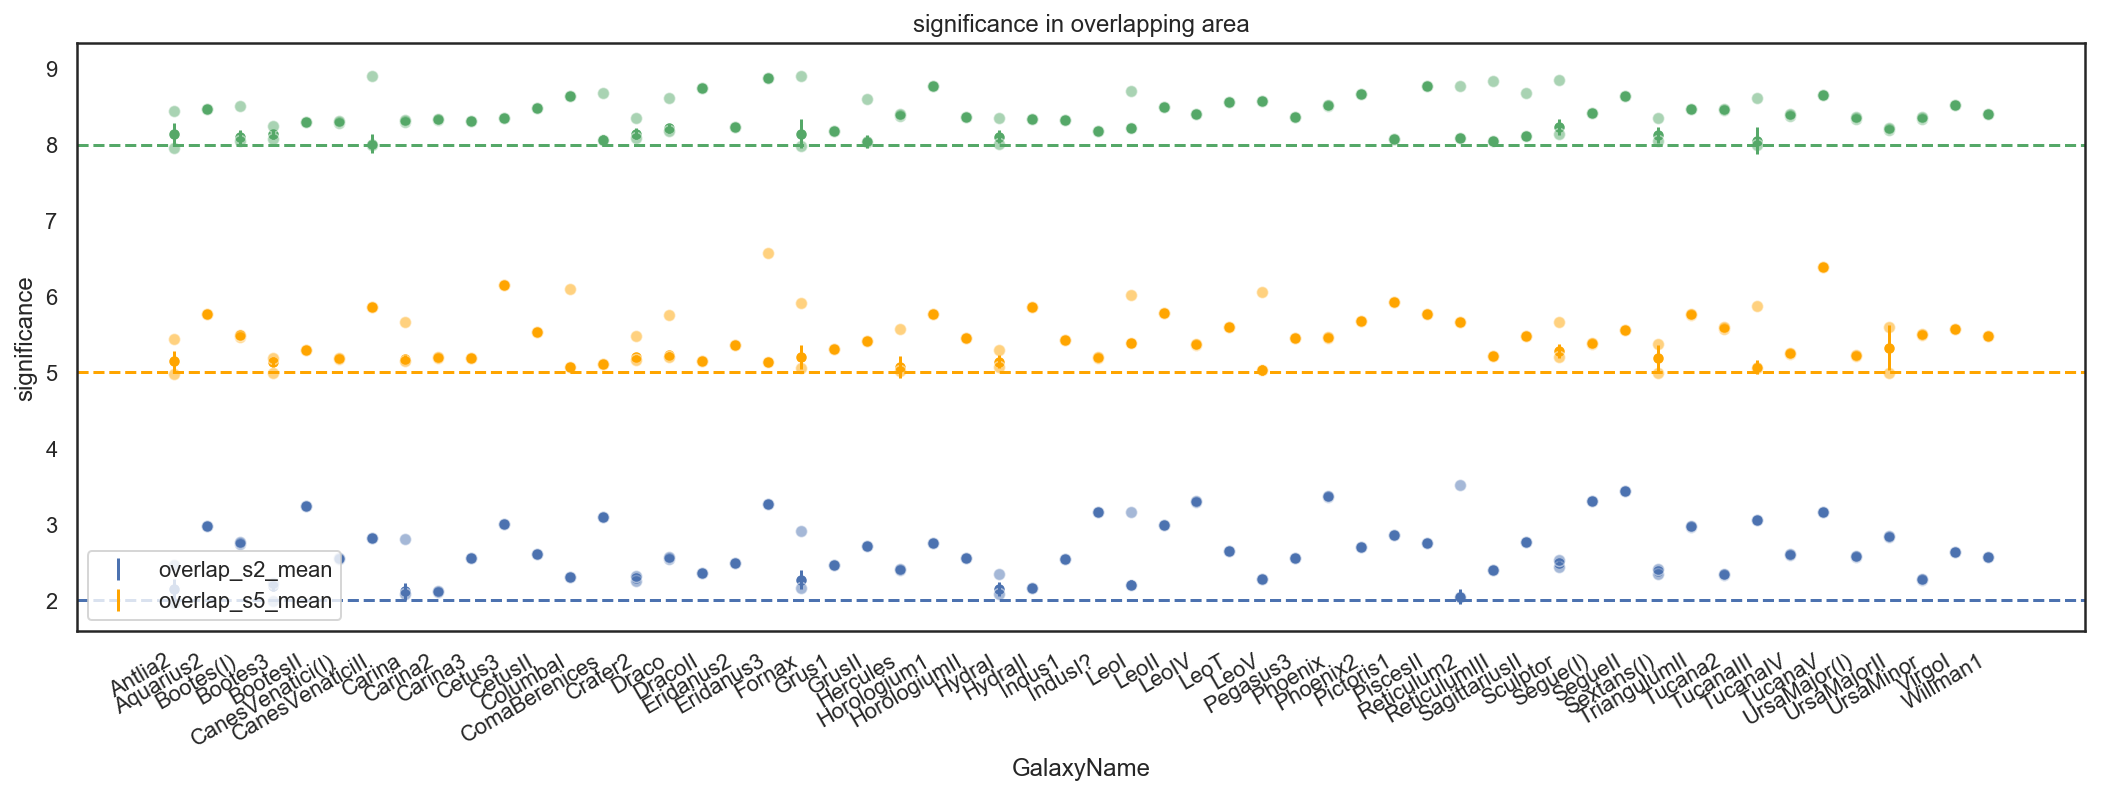

In [8]:
sns.set(style="white", color_codes=True, font_scale=1)
fig, ax = plt.subplots(figsize=(18, 6))

sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s2_mean'], ax=ax, color='b')
sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s2_min'], ax=ax, color='b', alpha=alpha)
sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s2_max'], ax=ax, color='b', alpha=alpha)
ax.errorbar(df['GalaxyName'], df['overlap_s2_mean'], yerr=df['overlap_s2_std'], color='b', ls='none')
ax.axhline(2, ls='--', color='b')

sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s5_mean'], ax=ax, color='orange')
sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s5_min'], ax=ax, color='orange', alpha=alpha)
sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s5_max'], ax=ax, color='orange', alpha=alpha)
ax.errorbar(df['GalaxyName'], df['overlap_s5_mean'], yerr=df['overlap_s5_std'], color='orange', ls='none')
ax.axhline(5, ls='--', color='orange')

sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s8_mean'], ax=ax, color='g')
sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s8_min'], ax=ax, color='g', alpha=alpha)
sns.scatterplot(x=df['GalaxyName'], y=df['overlap_s8_max'], ax=ax, color='g', alpha=alpha)
ax.errorbar(df['GalaxyName'], df['overlap_s8_mean'], yerr=df['overlap_s8_std'], color='g', ls='none')
ax.axhline(8, ls='--', color='g')

fig.autofmt_xdate()
ax.set_ylabel('significance')
ax.set_title('significance in overlapping area')

# plt.savefig('sig_overlap.png', bbox_inches='tight', dpi=300)

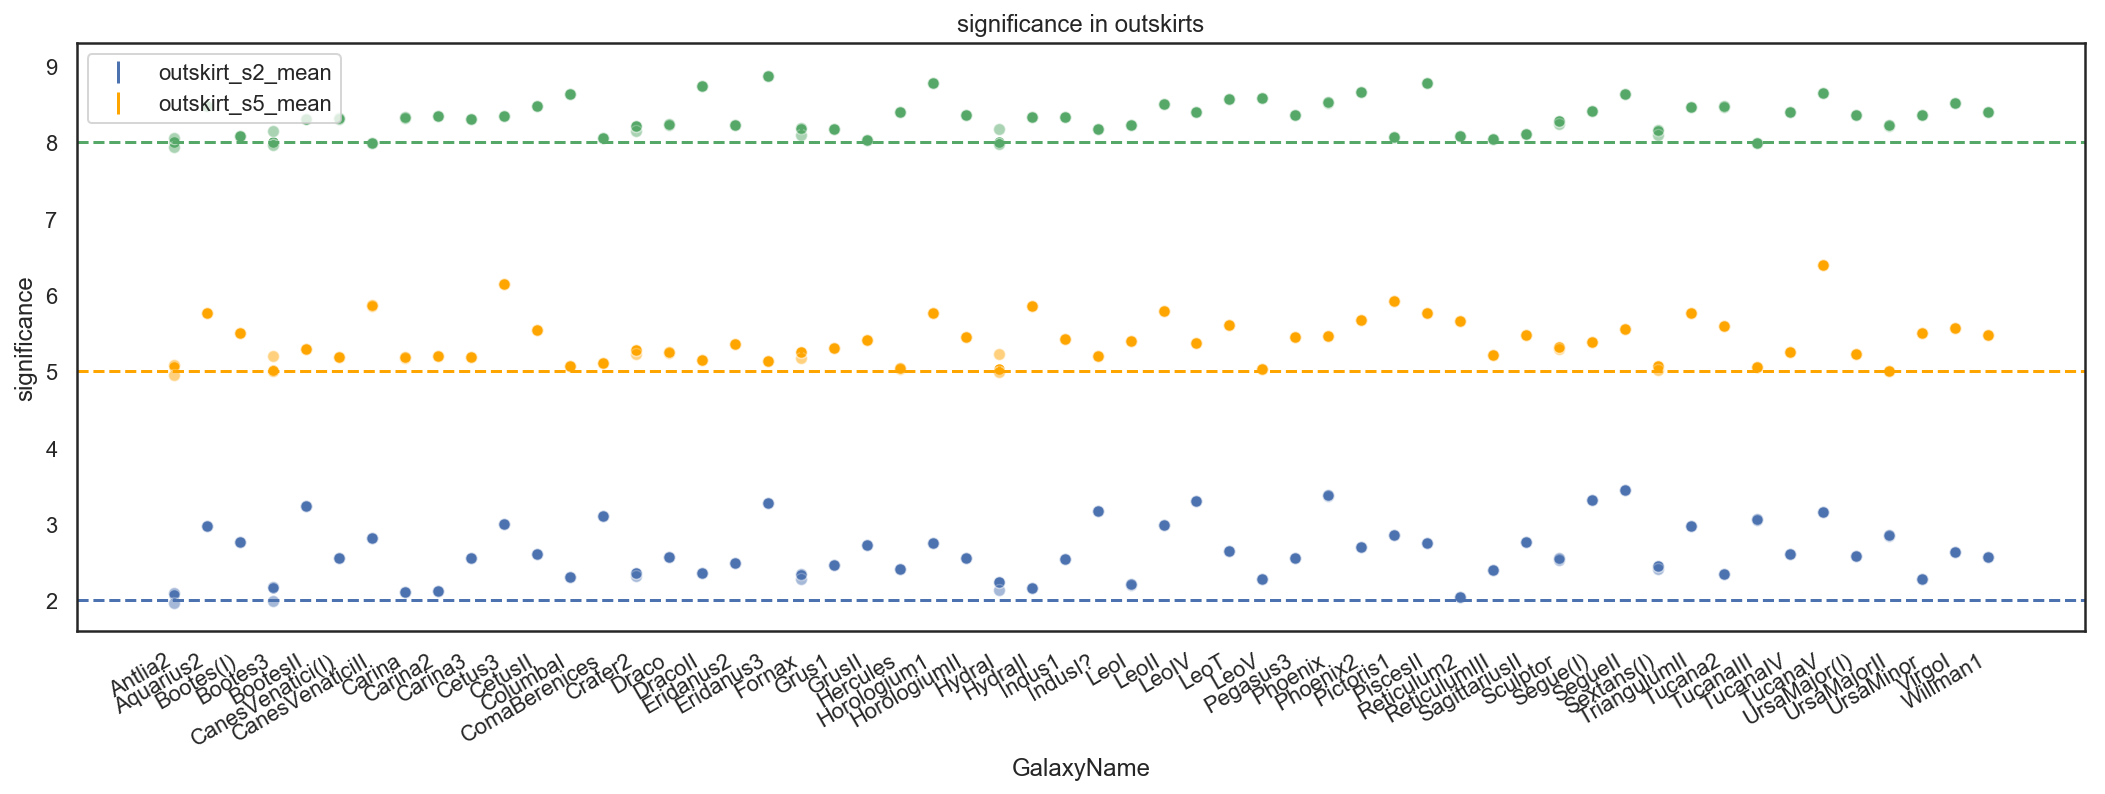

In [9]:
sns.set(style="white", color_codes=True, font_scale=1)
fig, ax = plt.subplots(figsize=(18, 6))

sns.scatterplot(x=df['GalaxyName'], y=df['outskirt_s2_mean'], ax=ax, color='b')
sns.scatterplot(x=df['GalaxyName'], y=df['outskirt_s2_min'], ax=ax, color='b', alpha=alpha)
sns.scatterplot(x=df['GalaxyName'], y=df['outskirt_s2_max'], ax=ax, color='b', alpha=alpha)
ax.errorbar(df['GalaxyName'], df['outskirt_s2_mean'], yerr=df['outskirt_s2_std'], color='b', ls='none')
ax.axhline(2, ls='--', color='b')

sns.scatterplot(x=df['GalaxyName'], y=df['outskirt_s5_mean'], ax=ax, color='orange')
sns.scatterplot(x=df['GalaxyName'], y=df['outskirt_s5_min'], ax=ax, color='orange', alpha=alpha)
sns.scatterplot(x=df['GalaxyName'], y=df['outskirt_s5_max'], ax=ax, color='orange', alpha=alpha)
ax.errorbar(df['GalaxyName'], df['outskirt_s5_mean'], yerr=df['outskirt_s5_std'], color='orange', ls='none')
ax.axhline(5, ls='--', color='orange')

sns.scatterplot(x=df['GalaxyName'], y=df['outskirt_s8_mean'], ax=ax, color='g')
sns.scatterplot(x=df['GalaxyName'], y=df['outskirt_s8_min'], ax=ax, color='g', alpha=alpha)
sns.scatterplot(x=df['GalaxyName'], y=df['outskirt_s8_max'], ax=ax, color='g', alpha=alpha)
ax.errorbar(df['GalaxyName'], df['outskirt_s8_mean'], yerr=df['outskirt_s8_std'], color='g', ls='none')
ax.axhline(8, ls='--', color='g')

fig.autofmt_xdate()
ax.set_ylabel('significance')
ax.set_title('significance in outskirts')

# plt.savefig('sig_outskirt.png', bbox_inches='tight', dpi=300)

# some dwarfs

Fornax

half-light radius: 0.3 deg
number of stars of the Plummer: 14912
kernel size of outer aperture outside of the Plummer: 0.50 deg
surface density of uniform background = 15045 per deg^2 

Added a mask array telling if pixels are inside the dwarf. 

Added a mask array telling if pixels overlap the dwarf and the outer aperture. 

Took 0.3897s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



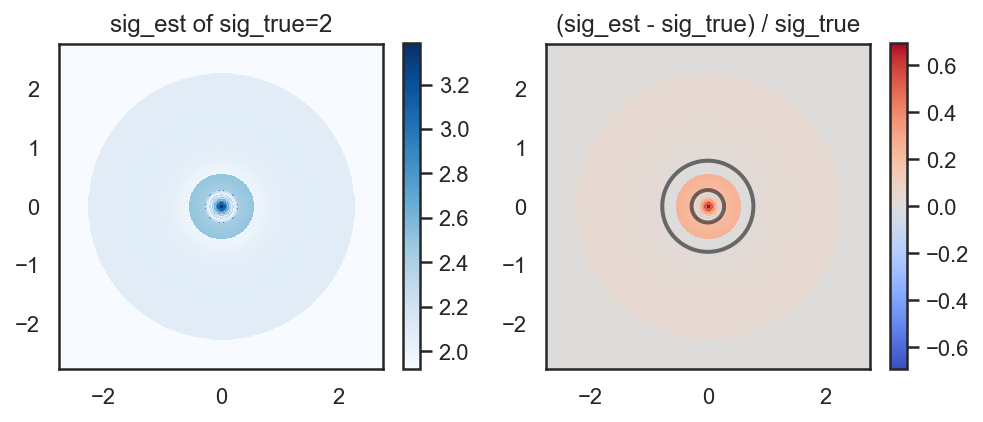

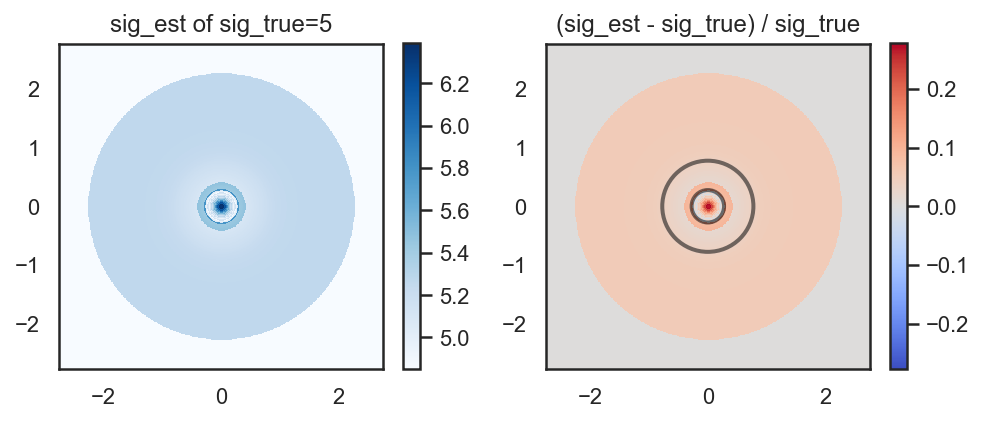

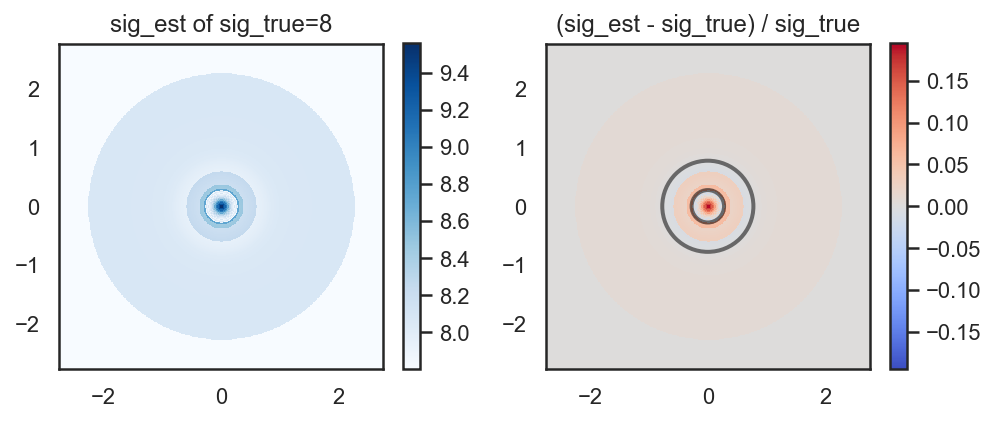

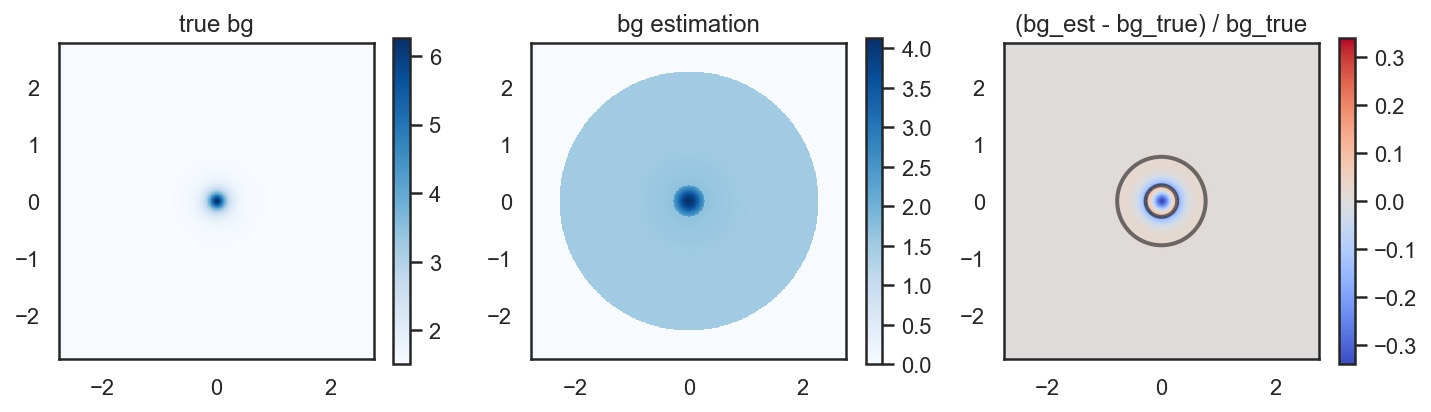

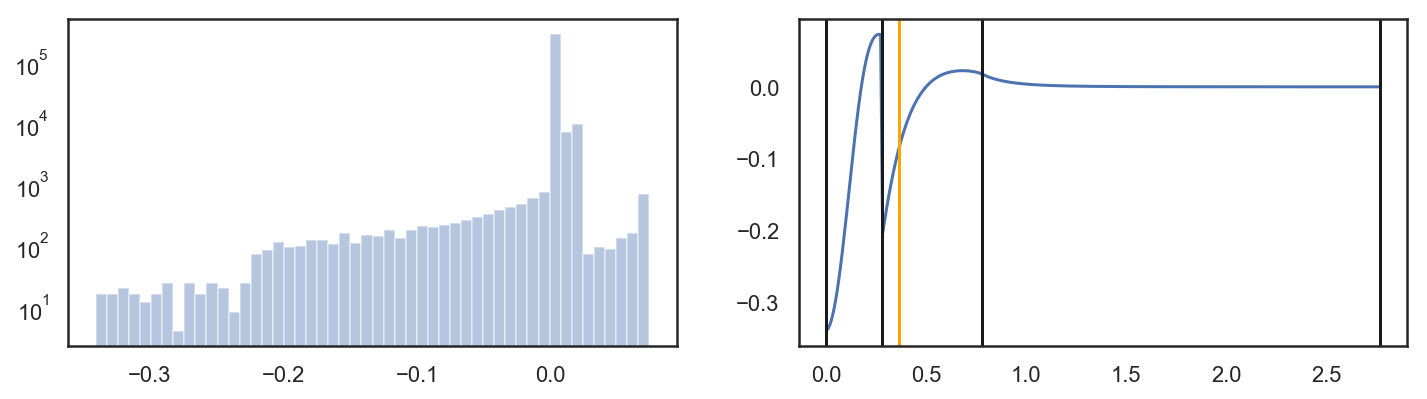

In [10]:
detail_single_dwarf('Fornax', df_all)

Crater2

half-light radius: 0.5 deg
number of stars of the Plummer: 4129
kernel size of outer aperture outside of the Plummer: 0.50 deg
surface density of uniform background = 4219 per deg^2 

Added a mask array telling if pixels are inside the dwarf. 

Added a mask array telling if pixels overlap the dwarf and the outer aperture. 

Took 1.1772s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



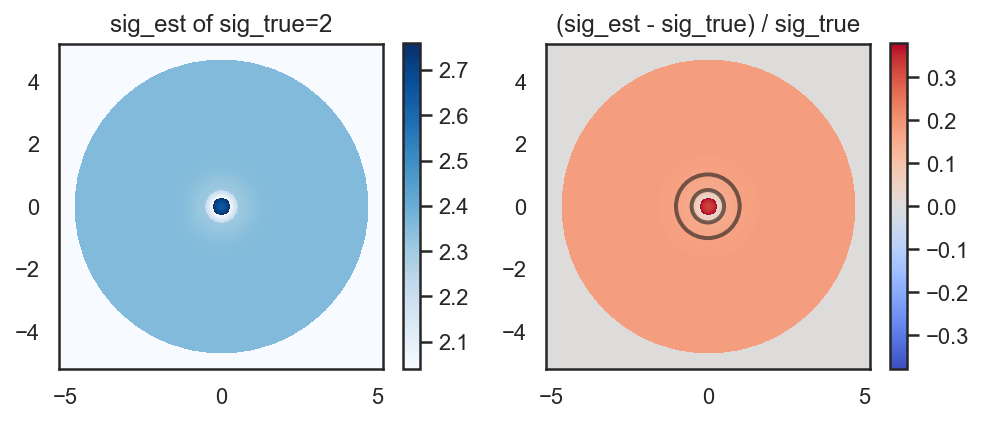

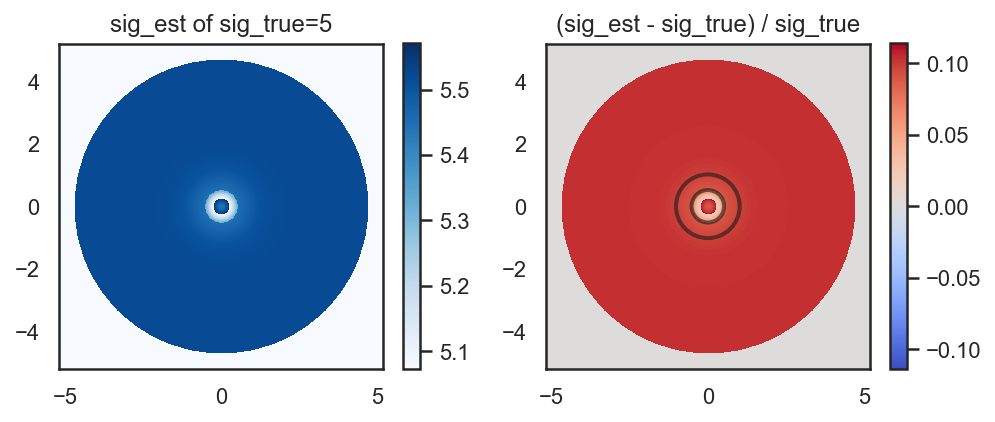

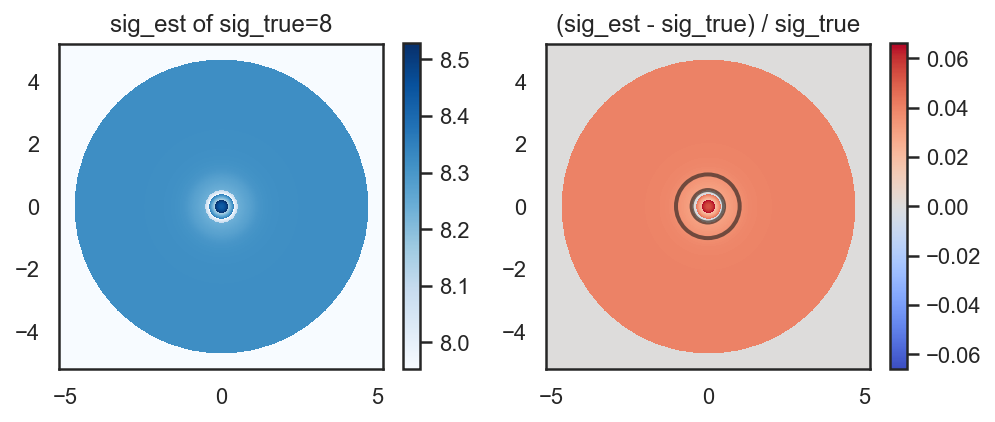

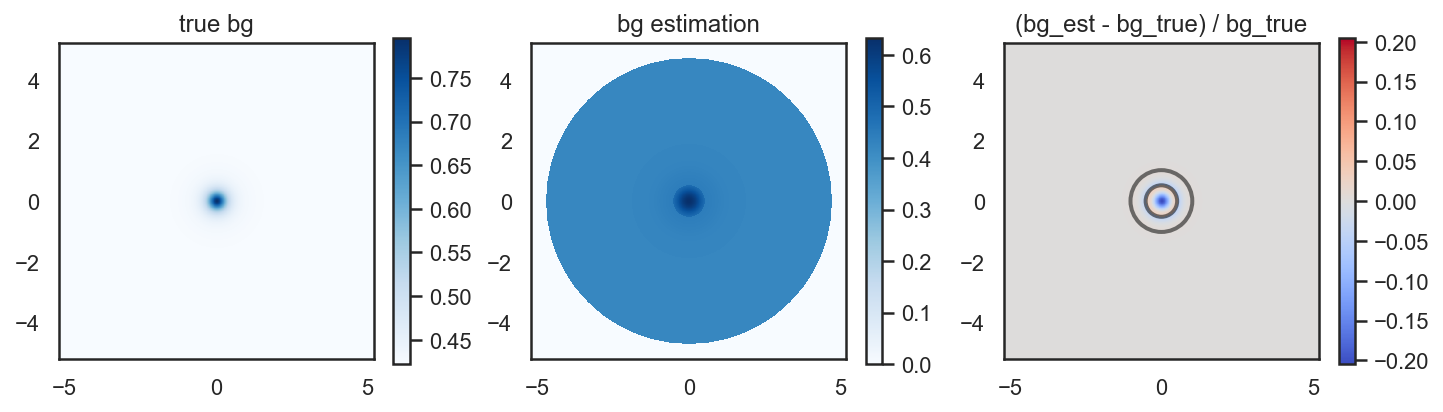

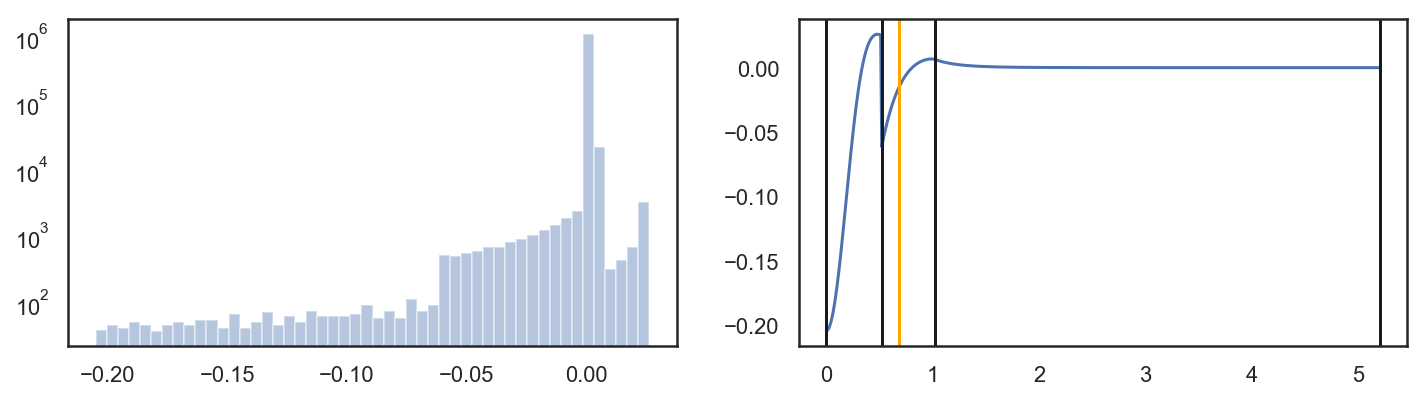

In [12]:
detail_single_dwarf('Crater2', df_all)

Antlia2

half-light radius: 1.3 deg
number of stars of the Plummer: 116512
kernel size of outer aperture outside of the Plummer: 0.50 deg
surface density of uniform background = 22606 per deg^2 

Added a mask array telling if pixels are inside the dwarf. 

Added a mask array telling if pixels overlap the dwarf and the outer aperture. 

Took 8.1483s to calculate Poisson sig.
Added sig_poisson to the KDE_MWSatellite object. 



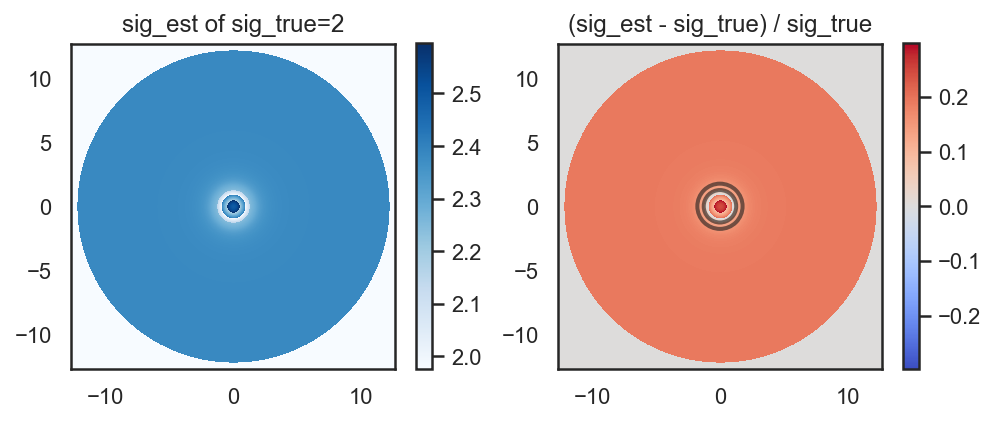

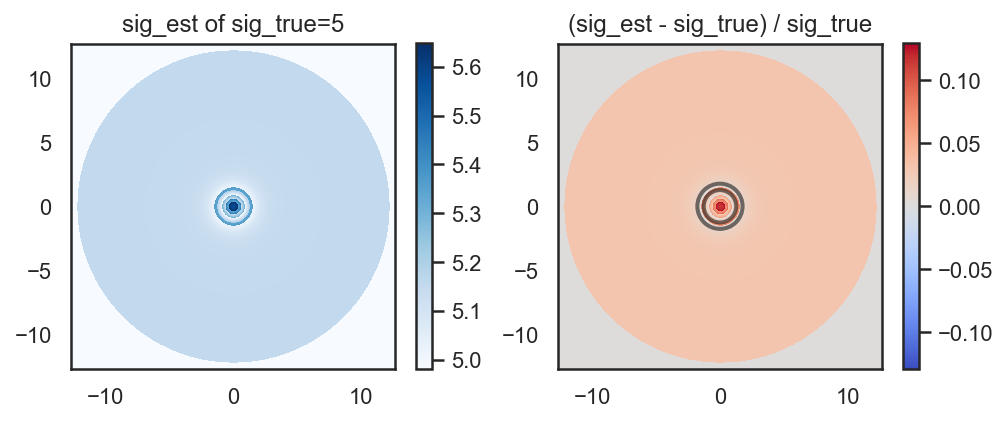

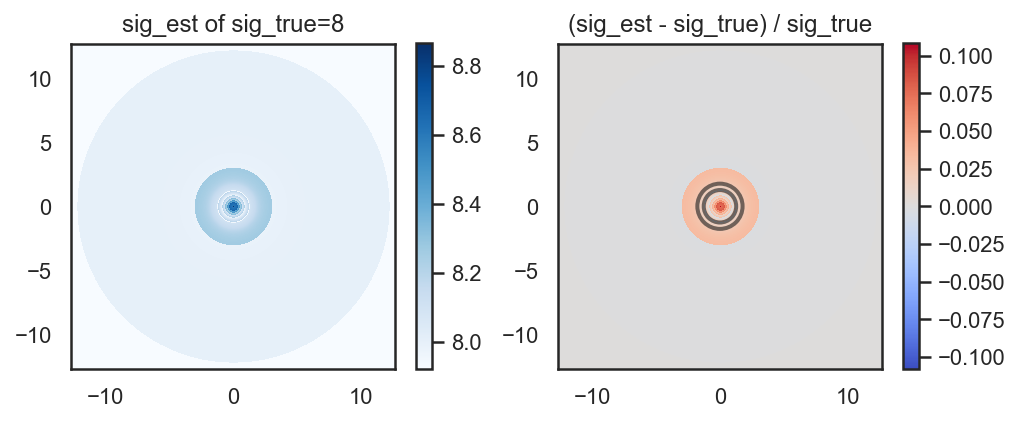

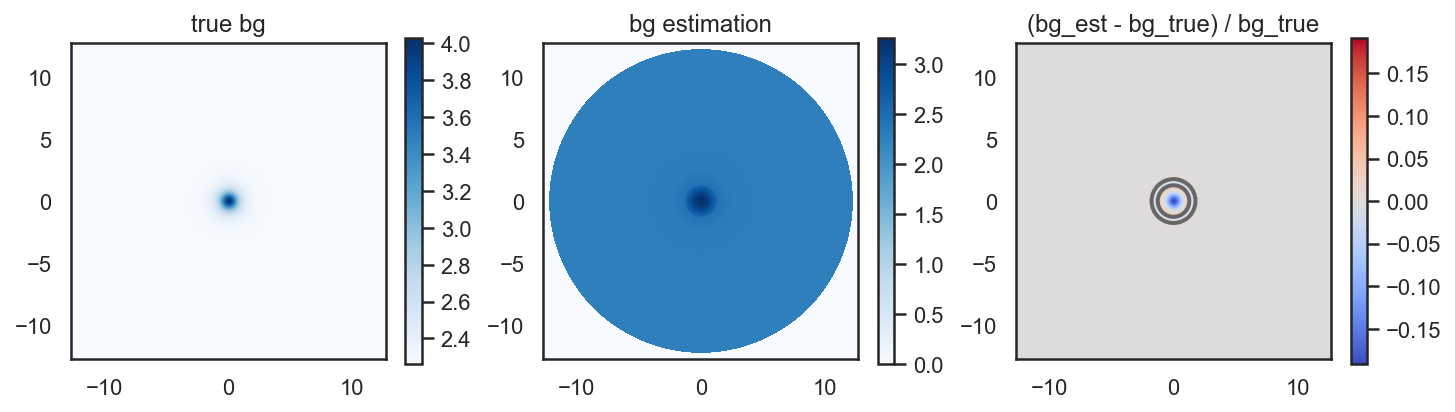

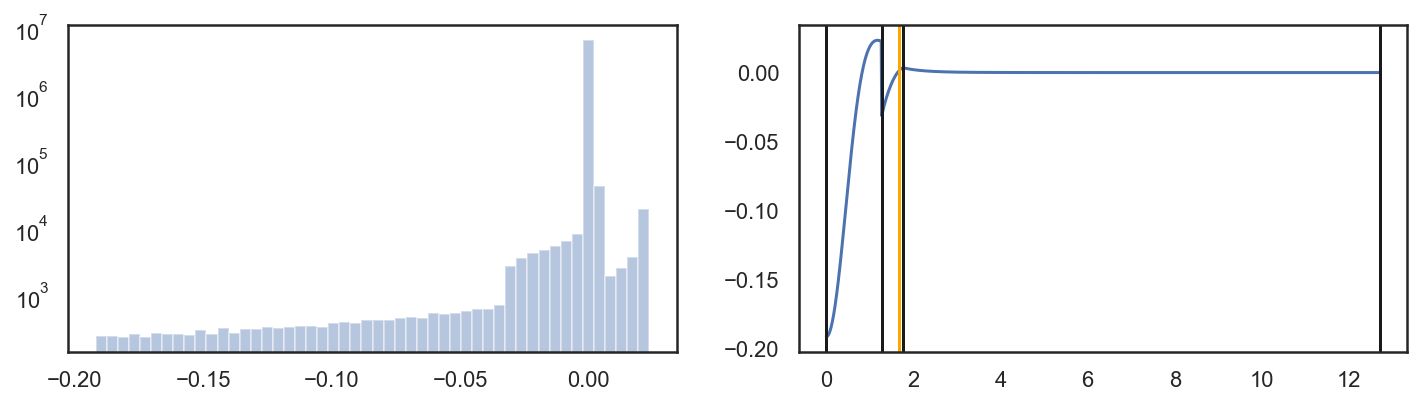

In [13]:
detail_single_dwarf('Antlia2', df_all)